# PURCHASE PREDICTION USING DECISION TREE CLASSIFIER

1. Project Overview

This project aims to predict whether a customr will make a purchase based on their demographic and behavioral data.
By laveraging ML techniques, specifically Decision Tree Classifier, this model will help businesses understand customer 
behaviour and tailor their marketing efforts accordingly.

2. Problem Statement

Predicting customer purchase behaviour is crucial for opimtimizing marketing strategies and improving customer experience.
Given the historical customer data, i need to classify whether a customer will purchase a product or not based on their 
demographic and behavioral attributes.




##LANGUAGES AND LIBRARIES USED TO COMPLETE THIS PROJECT:

1. Python - Programming
2. Pandas and Numpy - Data manipulation
3. Matplotlib and Seaborn - Data visualization
4. Scikit-learn - Machine learning Model Development

### IMPORTING RELEVANT LIBRARIES

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

### DATA PREPARATION

In [80]:
#LOAD(READ) THE DATASET
Customers = pd.read_csv("bank-full.csv", delimiter=';')

In [81]:
#DISPLAYING FIRST 5 ROWS OF THE DATASET
print(Customers.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [82]:
#DISPLAYING LAST 5 ROWS OF THE DATASET
print(Customers.tail())

       age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  


In [83]:
#DISPLAYING THE SHAPE AND SUMMARY STATS OF THE DATASET
Customers.shape
print(Customers.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [84]:
#HANDLING MISSING DATA
Customers.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [85]:
#HANDLING DUPLICATES
duplicates = Customers[Customers.duplicated()]
print("Duplicates:\n", duplicates)

Duplicates:
 Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [86]:
Customers_no_duplicates = Customers.drop_duplicates()
print("Dataset after removing duplicates:\n", Customers_no_duplicates)

Dataset after removing duplicates:
        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contac

In [87]:
#DEALING WITH CATEGORICAL COLUMNS 
label_encoder = LabelEncoder()
categorical_cols = Customers.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    Customers[f"[col]_encoded"] = label_encoder.fit_transform(Customers[col])
    
#Dropping the original categorical columns
Customers.drop(categorical_cols, axis=1, inplace=True)

Customers.head(10)

,age,balance,day,duration,campaign,pdays,previous,[col]_encoded
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
5,35,231,5,139,1,-1,0,0
6,28,447,5,217,1,-1,0,0
7,42,2,5,380,1,-1,0,0
8,58,121,5,50,1,-1,0,0
9,43,593,5,55,1,-1,0,0


### MACHINE LEARNING MODEL DEVELOPMENT

In [88]:
# Check column names again to identify the target column
print(Customers.head())

# Adjust X and y based on the actual target column name
X = Customers.drop("[col]_encoded", axis=1)  # Replace with the actual target column name if renamed
y = Customers["[col]_encoded"]               # Same here

# Verify that X and y are correctly defined
print(X.head())
print(y.head())


   age  balance  day  duration  campaign  pdays  previous  [col]_encoded
0   58     2143    5       261         1     -1         0              0
1   44       29    5       151         1     -1         0              0
2   33        2    5        76         1     -1         0              0
3   47     1506    5        92         1     -1         0              0
4   33        1    5       198         1     -1         0              0
   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0
0    0
1    0
2    0
3    0
4    0
Name: [col]_encoded, dtype: int32


FEATURE SCALING

In [89]:
#INITIALIZE THE STANDARD SCALER 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

TRAIN-TEST SPLIT

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [93]:
#INITIALIZING THE MODEL
dt_classifier = DecisionTreeClassifier(random_state=42)

#FITTING MODEL TO THE TRAINING DATA
dt_classifier.fit(X_train, y_train)

#PREDICTIONS
y_pred = dt_classifier.predict(X_test)

HYPERPARAMETER TUNING USING GRID-SEARCH

In [95]:
param_grid = {
    "max_depth": [3, 5, 10, None], 
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


grid_search = GridSearchCV(estimator = dt_classifier, param_grid =param_grid, cv=5, scoring ="accuracy")
grid_search.fit(X_train, y_train)

#DETERMINING BEST PARAMETERS
best_dt = grid_search.best_estimator_

MODEL EVALUATION

In [96]:
#ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 84.83


<Axes: >

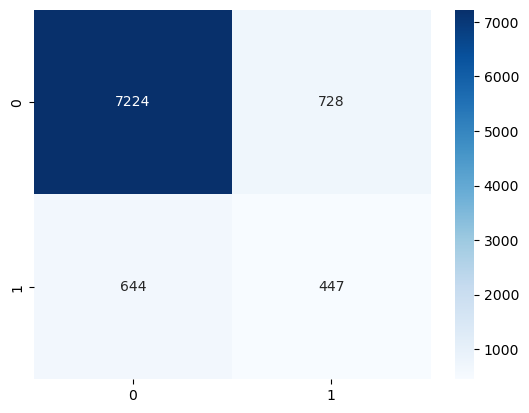

In [97]:
#DISPLAYING AND VISUALIZING THE CONFUSION MATRIX
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

In [98]:
#CLASSIFICATION REPORT
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7952
           1       0.38      0.41      0.39      1091

    accuracy                           0.85      9043
   macro avg       0.65      0.66      0.65      9043
weighted avg       0.85      0.85      0.85      9043



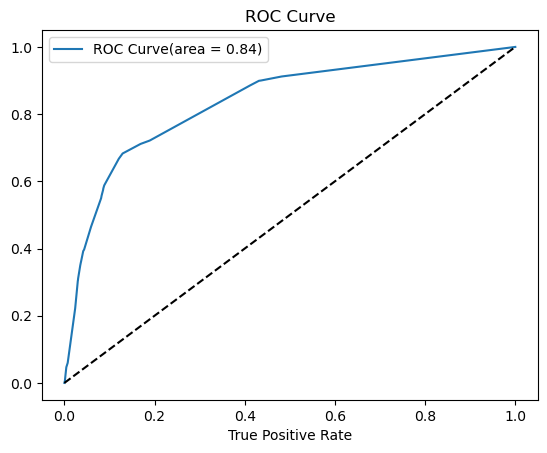

In [99]:
#VISUALIZATION OF THE ROC CURVE
fpr, tpr, threshold = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, label= f"ROC Curve(area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.xlabel("True Positive Rate")

plt.title("ROC Curve")
plt.legend()

plt.show()

CORRELATION OF THE DATASET

In [100]:
Customers.corr()

,age,balance,day,duration,campaign,pdays,previous,[col]_encoded
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
[col]_encoded,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


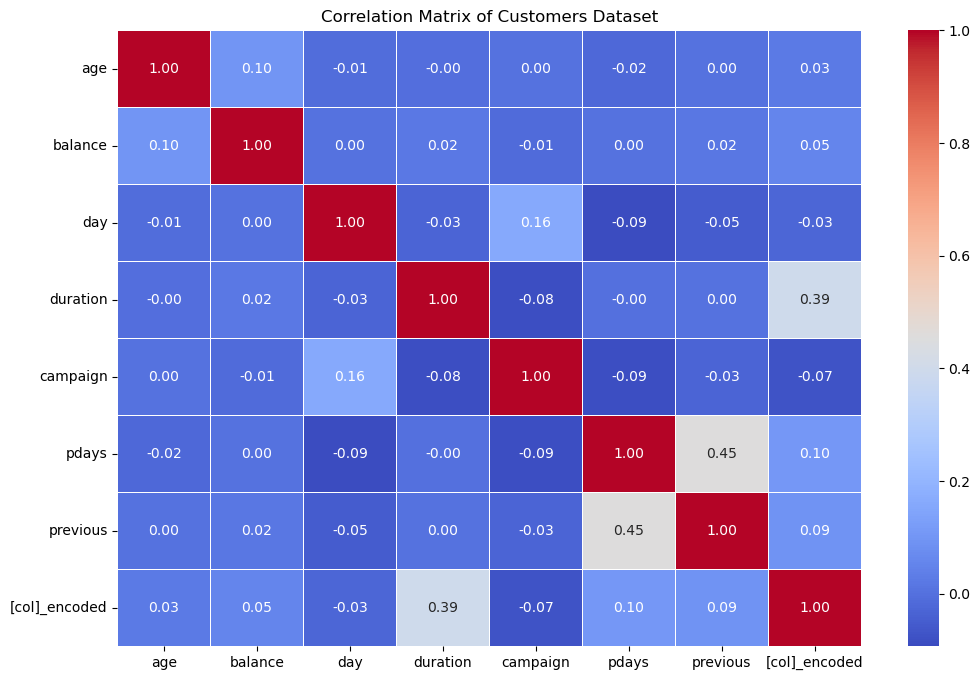

In [101]:
#CORRELATION HEATMAP
plt.figure(figsize =(12,8))
sns.heatmap(Customers.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Customers Dataset')

plt.show()

## CONCLUSION

### Key Steps in the Project:

1. Data Loading & Exploration:

Loaded and explored the dataset, checking for duplicates and missing values, which were not present.
Displayed summary statistics of the dataset.

2. Data Cleaning & Preprocessing:

Encoded categorical features using LabelEncoder and dropped the original categorical columns.
Performed feature scaling using StandardScaler to normalize the data.

3. Model Building:

Split the data into training and testing sets.
Applied the Decision Tree Classifier and trained the model on the training set.

4. Hyperparameter Tuning:

Used GridSearchCV to tune hyperparameters like max_depth, min_samples_split, and min_samples_leaf.

5. Model Evaluation:

Achieved an accuracy of 84.83%.
Visualized the confusion matrix and classification report to evaluate model performance, with precision, recall, and F1-score.
Plotted the ROC curve for additional evaluation.


### Possible Improvements:
Class Imbalance: Based on the classification report, there's an imbalance between classes (0: no purchase vs. 1: purchase). 

This can be addressed by techniques such as oversampling the minority class (SMOTE) or using class weights in the Decision Tree model.

Feature Engineering: You can try adding more derived features that might capture interactions between variables, like age groups, or using domain knowledge to create new features that could improve the model.

Model Evaluation Metrics: Accuracy alone might not be the best metric in this case due to the class imbalance. 
You could focus on precision-recall curves or AUC scores for a more nuanced performance evaluation.

Tree Visualization: You can visualize the Decision Tree to understand how the model is making decisions. 
This can be done using plot_tree from sklearn.tree or other visualization libraries.